# Počítačový návrh léčiv, 7. cvičení
Jiří Reiniš

**Dnes budeme pouzivat na balicek seaborn na vizualizace, "je to spasa".**

In [44]:
import seaborn
from rdkit.Chem import AllChem as ch
from rdkit.Chem import Lipinski
from rdkit.Chem import rdMolDescriptors
from rdkit.Chem import Descriptors
from rdkit.SimDivFilters.rdSimDivPickers import MaxMinPicker
import sklearn

import matplotlib
from sklearn import decomposition
from sklearn import preprocessing
from sklearn.metrics.pairwise import euclidean_distances

from math import sqrt
import pandas as pd

In [5]:
suppl = ch.SDMolSupplier("../../data/drugbank.sdf")
mols = [m for m in suppl if m]

**Definuju si funkce, rikajici mi neco o molekulach, ktere pak aplikuji na drugbank.**

In [6]:
lip_func = [Lipinski.NumHAcceptors, Lipinski.NumHDonors, Descriptors.ExactMolWt, Descriptors.MolLogP,
           rdMolDescriptors.CalcTPSA, Lipinski.NumRotatableBonds]

**Timto si drugbank udelame datovou matici se sedmi promennymi odpovidajicimi definovanym funkcnim**

In [7]:
drugbank = {}
# nahraju do slovniku
for mol in mols:
    drugbank[mol.GetProp("DRUGBANK_ID")] = [f(mol) for f in lip_func]

# nahraju do seznamu
data = [[f(mol) for f in lip_func] for mol in mols]

In [8]:
drugbank["DB00006"]

[29, 28, 2178.9858128759984, -8.116429999999927, 901.5700000000003, 66]

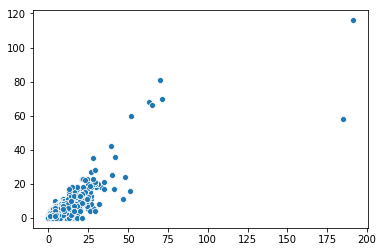

In [9]:
seaborn.scatterplot(x=[x[0] for x in data], y=[x[1] for x in data])

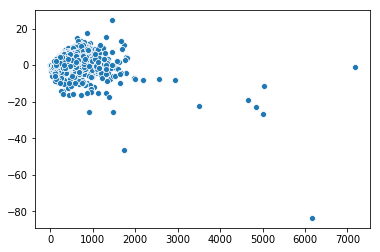

In [10]:
seaborn.scatterplot(x=[x[2] for x in data], y=[x[3] for x in data], )

**Provedeme PCA**

In [11]:
pca = decomposition.PCA(n_components=2)
pca.fit(data)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [12]:
t_data = pca.transform(data)

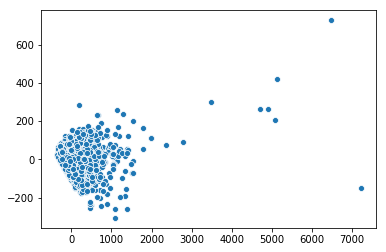

In [20]:
seaborn.scatterplot(x=[x[0] for x in t_data], y=[x[1] for x in t_data])

**Nemame to normalizovany, to je "zasadni chyba"**

In [31]:
n_data = preprocessing.scale(data)

In [32]:
pca = decomposition.PCA(n_components=6)
pca.fit(n_data)
t_data_2 = pca.transform(n_data)

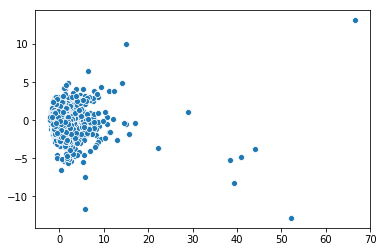

In [33]:
seaborn.scatterplot(x=[x[0] for x in t_data_2], y=[x[1] for x in t_data_2])

In [34]:
print(pca.explained_variance_ratio_)

[0.73870005 0.17603981 0.04331457 0.02621776 0.0105667  0.00516111]


In [35]:
print(pca.components_)

[[ 0.44328842  0.44234305  0.42223804 -0.24171234  0.46681877  0.39140569]
 [ 0.02683306  0.15565059 -0.38006175 -0.81825575  0.07730662 -0.39381108]
 [ 0.57877831 -0.21164655  0.28821015  0.19075348  0.07868135 -0.70326288]
 [ 0.37275837 -0.74891803 -0.03005062 -0.32903665 -0.13580548  0.41540545]
 [ 0.53238362  0.24206831 -0.7268014   0.32475857 -0.03636748  0.15145832]
 [ 0.21309602  0.34034684  0.25506801 -0.14802888 -0.86611053  0.04042805]]


**Nyni si vybereme nejake vzajemne vzdalene objekty a ty si vizualizujeme**

In [38]:
def distance_function(index1, index2, *args):
    return sqrt(sum((x-y)**2 for x,y in zip(n_data[index1], n_data[index2])))

In [39]:
picker = MaxMinPicker()

In [42]:
picked = list(picker.LazyPick(distance_function, len(n_data), 20, seed=666))

In [43]:
display(picked)

[4980,
 523,
 4472,
 4501,
 454,
 1146,
 3034,
 2562,
 4502,
 4406,
 4386,
 591,
 6749,
 253,
 6657,
 6970,
 0,
 1010,
 3546,
 6845]

In [47]:
t_frame = pd.DataFrame(t_data_2, columns=["x", "y", "z", "a", "b", "c"])

In [50]:
t_frame["picked"] = [x in picked for x,y in enumerate(data)]

In [52]:
t_frame

,x,y,z,a,b,c,picked
0,15.731797,-1.794264,-2.796199,-0.403379,-1.182441,-0.536701,True
1,7.665831,-0.609965,-1.140883,-0.915461,-0.688092,-0.140373,False
2,6.025037,0.437575,-0.222338,-0.844823,-0.751406,-0.196047,False
3,8.123199,-1.905362,-1.491888,-0.793996,-0.740935,-0.055795,False
4,3.410111,-1.960465,0.861818,0.033858,-1.328347,-0.125103,False
5,5.587201,0.346902,-0.153023,-0.391183,-0.783612,-0.175165,False
6,4.917130,-0.351705,-0.009281,-1.024014,-0.443691,0.297244,False
7,-0.132785,0.553824,-0.070207,-0.068041,0.142415,-0.174049,False
8,5.751473,-1.886675,1.638157,-0.649798,-0.664937,-0.560663,False
9,1.906293,0.490793,-0.178820,-0.614910,0.300541,-0.044103,False


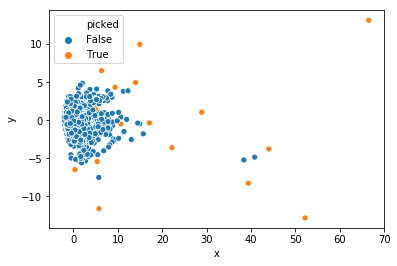

In [53]:
seaborn.scatterplot(data=t_frame, x="x", y="y", hue="picked")